# EDA and Preprocessing - Bank Marketing Dataset

In [86]:
# importing required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


bank = pd.read_csv("bank.csv")

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

# changing figure size

In [6]:
#shape of dataset
bank.shape

(11162, 17)

In [7]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [8]:
# display first 5 rows
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [9]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


**Notes:**
1. info tells us that there are no null values in dataset
2. only 7 features are numerical
3. 10 fetaures are categorical

In [10]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [11]:
# no null values
pd.isnull(bank).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

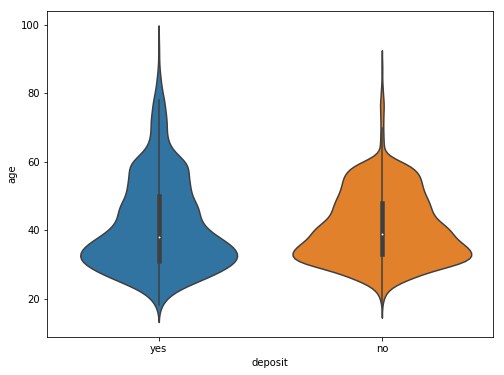

In [14]:
#violin plot for age
sns.violinplot(x="deposit", y="age", data=bank, size=8)
plt.show()

Age : This is age of client. A violin plot for age is plotted. It shows its spread as well as histogram. People saying yes has more spread.

In [15]:
bank["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

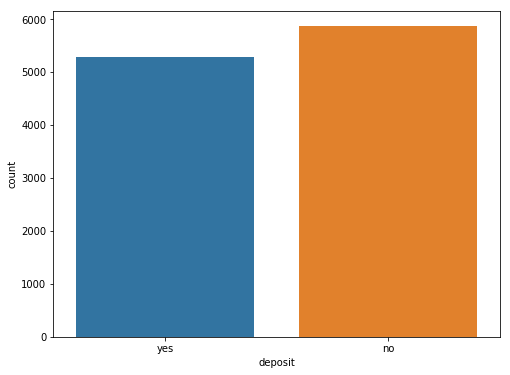

In [16]:
# count plot for deposit
#the dataset is fairly balanced
sns.countplot(data=bank,x=bank['deposit'])

Deposit : Whether the clients said yes to subscribe for a term deposit. It has two categories. ‘yes’ or ‘no’.

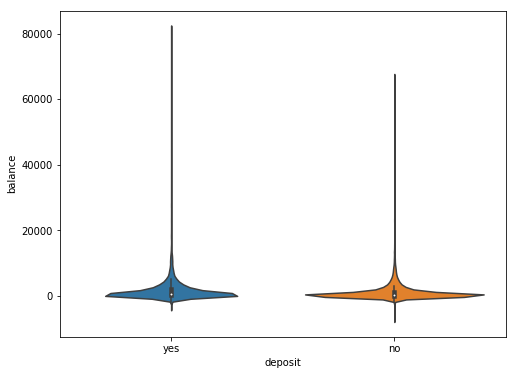

In [17]:
#violin plot for balance
sns.violinplot(x="deposit", y="balance", data=bank, size=8)
plt.show()

In [18]:
bank["poutcome"].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

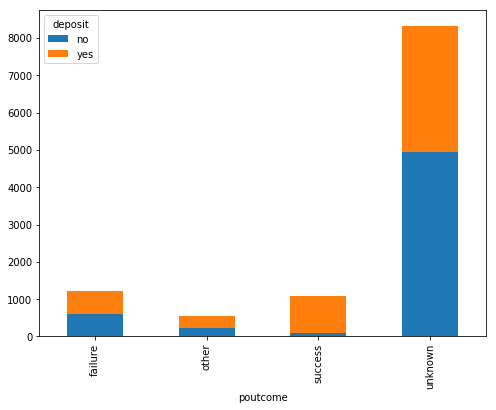

In [19]:
# bar chart for poutcome
types = bank.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

poutcome : The outcome of previous marketing campaign. It’s a categorical feature. Many of them were not contacted in previous campaign.

In [20]:
bank["previous"].value_counts()

0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
17      11
13      11
14       6
15       5
19       4
16       2
27       2
23       2
20       2
58       1
26       1
18       1
28       1
41       1
21       1
29       1
37       1
40       1
22       1
30       1
55       1
Name: previous, dtype: int64

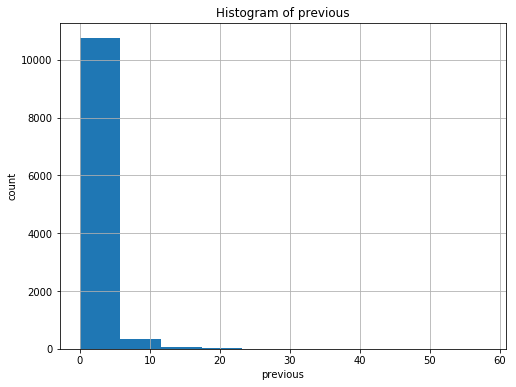

In [21]:
#histogram of previous
bank['previous'].hist()
plt.title('Histogram of previous')
plt.ylabel('count')
plt.xlabel('previous');
plt.show()

Previous : Number of times this client was contacted before this campaign.

In [22]:
bank["pdays"].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
 183      73
 184      52
 94       42
 93       41
 95       39
 87       34
 90       32
 98       31
 185      30
 187      28
 96       26
 97       26
 189      24
 188      24
 99       22
 105      22
 179      21
 175      20
 186      20
 370      19
 180      19
 196      19
 88       19
 89       18
 195      18
        ... 
 529       1
 481       1
 449       1
 403       1
 435       1
 459       1
 36        1
 476       1
 444       1
 428       1
 420       1
 404       1
 268       1
 228       1
 108       1
 68        1
 44        1
 20        1
 475       1
 12        1
 4         1
 771       1
 651       1
 603       1
 595       1
 587       1
 579       1
 515       1
 491       1
 683       1
Name: pdays, Length: 472, dtype: int64

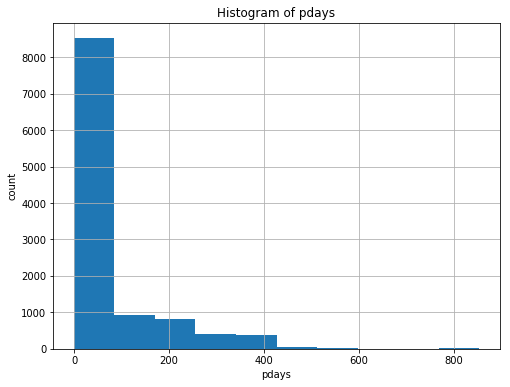

In [23]:
#histogram of pdays
bank['pdays'].hist()
plt.title('Histogram of pdays')
plt.ylabel('count')
plt.xlabel('pdays');
plt.show()

Pdays : number of days that passed after the client was last contacted in previous campaign. Its value is -1 if the client was not contacted previously.

In [24]:
bank["campaign"].value_counts()

1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
24       5
19       5
20       5
30       4
22       4
26       3
23       3
25       3
43       2
29       2
32       2
63       1
33       1
41       1
31       1
28       1
27       1
Name: campaign, dtype: int64

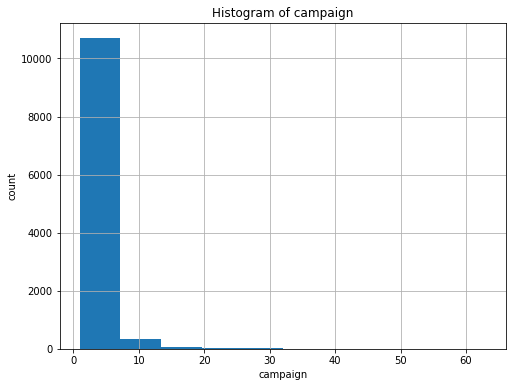

In [25]:
#Histogram of campaign
bank['campaign'].hist()
plt.title('Histogram of campaign')
plt.ylabel('count')
plt.xlabel('campaign');
plt.show()

campaign : Number of times this client was contacted during this campaign. 

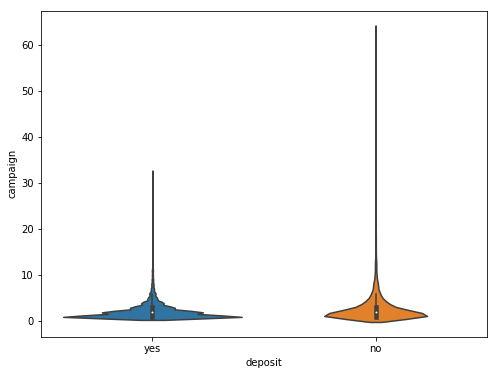

In [26]:
#violin plot for campaign
sns.violinplot(x="deposit", y="campaign", data=bank, size=8)
plt.show()

In [27]:
bank["month"].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

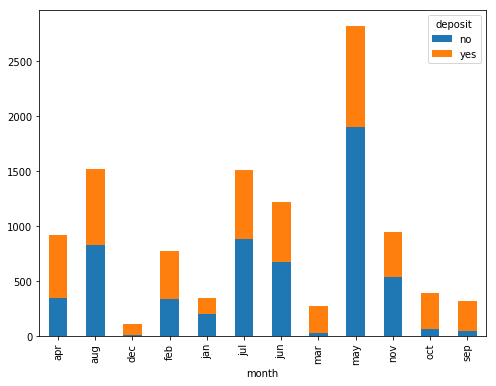

In [28]:
#bar chart for month
types = bank.groupby("month")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Month : the month in which the client was contacted. Maximum clients were contacted in May. 

In [29]:
bank["day"].value_counts()

20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: day, dtype: int64

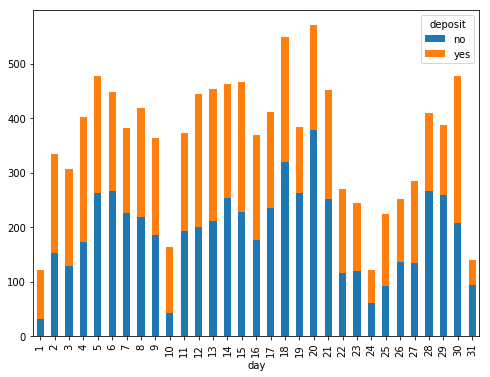

In [30]:
# group by days to display bar chart
types = bank.groupby("day")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Day : which day of the month was the client contacted. More clients were contacted in the middle of the month.

In [31]:
bank["contact"].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

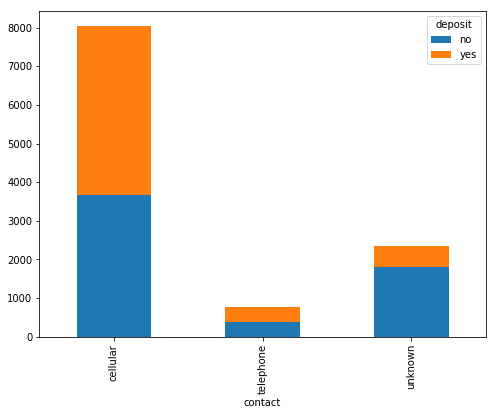

In [32]:
# group by contact to display bar chart
types = bank.groupby("contact")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Contact : This feature specifies the way of communication. It can be cellular or telephone. Some of them are unknown.

In [33]:
bank["loan"].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

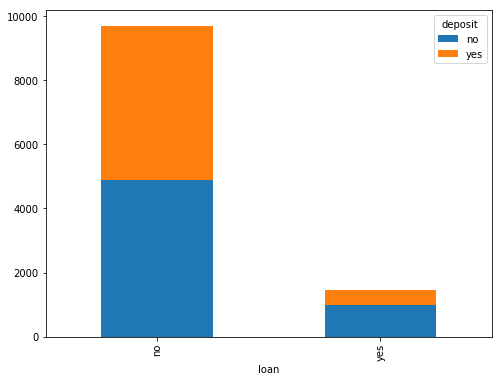

In [34]:
# group by loan to display bar chart
types = bank.groupby("loan")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Loan : Most of them don’t already have personal loan in bank.

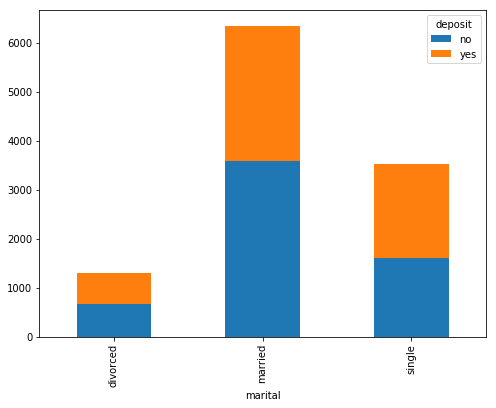

In [35]:
# group by marital to display bar chart
types = bank.groupby("marital")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Marital : This is a categorical feature. It has 3 categories. Married clients constitute the largest portion of this feature.

In [36]:
bank["housing"].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

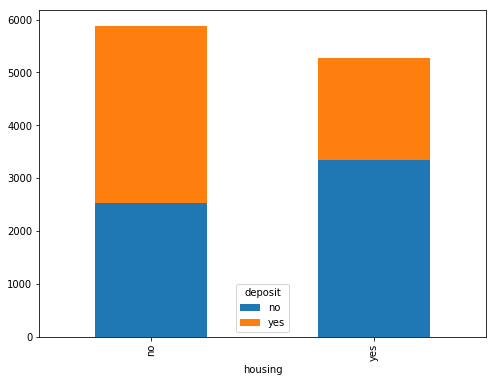

In [37]:
# group by housing to display bar chart
types = bank.groupby("housing")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Housing : Whether the client has already got any housing loan from bank? Apparently clients who do not already have housing loan tend to subscribe to deposit more. 

In [38]:
bank["default"].value_counts()

no     10994
yes      168
Name: default, dtype: int64

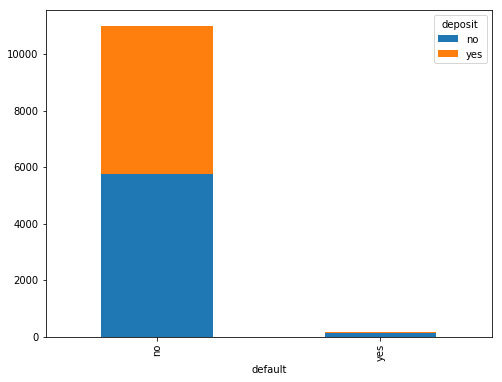

In [39]:
# group by default to display bar chart
types = bank.groupby("default")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Default : it tells whether the client has credit in bank or not? Most of them don’t have credit.

In [40]:
bank["job"].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

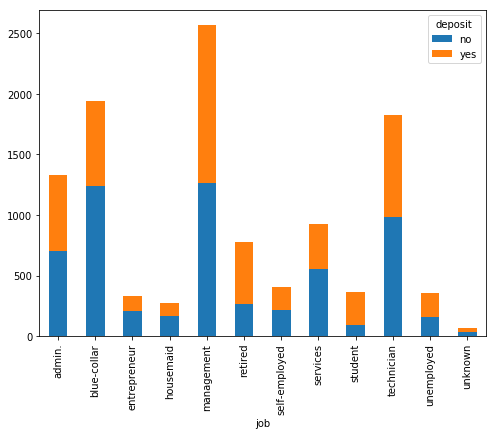

In [41]:
# group by job to display bar chart
types = bank.groupby("job")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Job : This is a categorical feature. It has 12 categories including unknown. The largest clients in this category belong to management jobs with percentage of 50 while unknown category has least count.

In [42]:
bank["education"].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

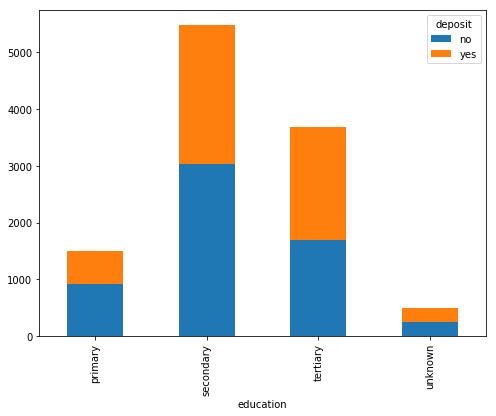

In [43]:
# group by education to display bar chart
types = bank.groupby("education")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

Education : Maximum clients belong to category of secondary education. The category tertiary education has larger ratio of clients saying yes to term deposit than any other category. 

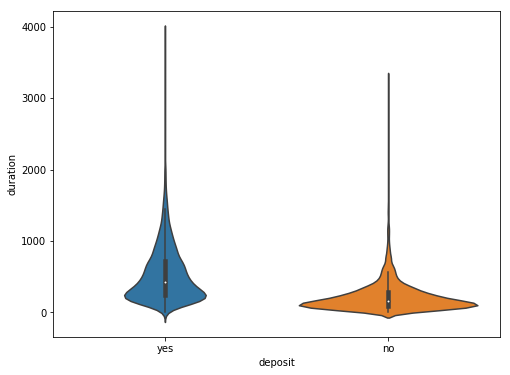

In [44]:
#violin plot for duration
sns.violinplot(x="deposit", y="duration", data=bank, size=8)
plt.show()

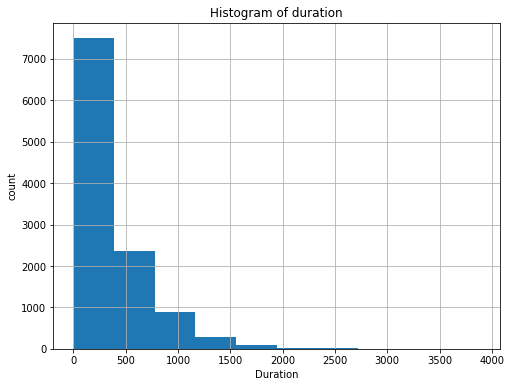

In [45]:
#Histogram of duration
bank['duration'].hist()
plt.title('Histogram of duration')
plt.ylabel('count')
plt.xlabel('Duration')
plt.show()

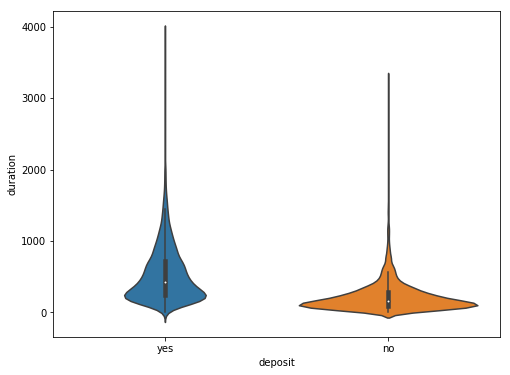

In [46]:
sns.violinplot(x="deposit", y="duration", data=bank, size=8)
plt.show()

Duration : The duration of call in seconds when the client was contacted last time. A histogram is plotted  for this and there are very less number of clients having very long duration. Violin plot indicates that people with longer duration have more possibility of saying yes to deposit.

# Preprocessing

In [47]:
# replacing yes and no from deposit column by 1 and 0 to convert categorical feature to numerical feature
bank['deposit'].replace(to_replace='yes', value=1, inplace=True)
bank['deposit'].replace(to_replace='no',  value=0, inplace=True)
bank['deposit'].head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [50]:
# replacing yes and no from loan column by 1 and 0 to convert categorical feature to numerical feature
bank['loan'].replace(to_replace='no', value=1, inplace=True)
bank['loan'].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,1,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,1,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,1,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,1,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,1,unknown,5,may,673,2,-1,0,unknown,1


In [51]:
# replacing yes and no from default column by 1 and 0 to convert categorical feature to numerical feature
bank['default'].replace(to_replace='no', value=1, inplace=True)
bank['default'].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,1,2343,yes,1,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,1,45,no,1,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,1,1270,yes,1,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,1,2476,yes,1,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,1,184,no,1,unknown,5,may,673,2,-1,0,unknown,1


In [52]:
bank["loan"].value_counts()

1    9702
0    1460
Name: loan, dtype: int64

In [53]:
# replacing yes and no from housing column by 1 and 0 to convert categorical feature to numerical feature
bank['housing'].replace(to_replace='no', value=1, inplace=True)
bank['housing'].replace(to_replace='yes',  value=0, inplace=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,1,2343,0,1,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,1,45,1,1,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,1,1270,0,1,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,1,2476,0,1,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,1,184,1,1,unknown,5,may,673,2,-1,0,unknown,1


In [54]:
# one hot encoding for marital feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['marital'])
bank = bank.drop('marital',axis = 1)
bank = bank.join(one_hot)

In [56]:
bank = bank.drop('divorced',axis = 1)

In [57]:
bank.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,married,single
0,59,admin.,secondary,1,2343,0,1,unknown,5,may,1042,1,-1,0,unknown,1,1,0
1,56,admin.,secondary,1,45,1,1,unknown,5,may,1467,1,-1,0,unknown,1,1,0
2,41,technician,secondary,1,1270,0,1,unknown,5,may,1389,1,-1,0,unknown,1,1,0
3,55,services,secondary,1,2476,0,1,unknown,5,may,579,1,-1,0,unknown,1,1,0
4,54,admin.,tertiary,1,184,1,1,unknown,5,may,673,2,-1,0,unknown,1,1,0


In [58]:
# one hot encoding for education feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['education'])
bank = bank.drop('education',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

,age,job,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,married,single,primary,secondary,tertiary
0,59,admin.,1,2343,0,1,unknown,5,may,1042,1,-1,0,unknown,1,1,0,0,1,0
1,56,admin.,1,45,1,1,unknown,5,may,1467,1,-1,0,unknown,1,1,0,0,1,0
2,41,technician,1,1270,0,1,unknown,5,may,1389,1,-1,0,unknown,1,1,0,0,1,0
3,55,services,1,2476,0,1,unknown,5,may,579,1,-1,0,unknown,1,1,0,0,1,0
4,54,admin.,1,184,1,1,unknown,5,may,673,2,-1,0,unknown,1,1,0,0,0,1


In [59]:
one_hot = pd.get_dummies(bank['job'])
bank = bank.drop('job',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,59,1,2343,0,1,unknown,5,may,1042,1,...,0,0,0,0,0,0,0,0,0,0
1,56,1,45,1,1,unknown,5,may,1467,1,...,0,0,0,0,0,0,0,0,0,0
2,41,1,1270,0,1,unknown,5,may,1389,1,...,0,0,0,0,0,0,0,0,1,0
3,55,1,2476,0,1,unknown,5,may,579,1,...,0,0,0,0,0,0,1,0,0,0
4,54,1,184,1,1,unknown,5,may,673,2,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# one hot encoding for contact feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['contact'])
bank = bank.drop('contact',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('unknown',axis = 1)
bank.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone
0,59,1,2343,0,1,5,may,1042,1,-1,...,0,0,0,0,0,0,0,0,0,0
1,56,1,45,1,1,5,may,1467,1,-1,...,0,0,0,0,0,0,0,0,0,0
2,41,1,1270,0,1,5,may,1389,1,-1,...,0,0,0,0,0,0,1,0,0,0
3,55,1,2476,0,1,5,may,579,1,-1,...,0,0,0,0,1,0,0,0,0,0
4,54,1,184,1,1,5,may,673,2,-1,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# one hot encoding for month feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['month'])
bank = bank.drop('month',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('dec',axis = 1)
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,aug,feb,jan,jul,jun,mar,may,nov,oct,sep
0,59,1,2343,0,1,5,1042,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,56,1,45,1,1,5,1467,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,41,1,1270,0,1,5,1389,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,55,1,2476,0,1,5,579,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,54,1,184,1,1,5,673,2,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [62]:
# one hot encoding for poutcome feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(bank['poutcome'])
bank = bank.drop('poutcome',axis = 1)
bank = bank.join(one_hot)
bank = bank.drop('other',axis = 1)
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,59,1,2343,0,1,5,1042,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,1,45,1,1,5,1467,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1,1270,0,1,5,1389,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,1,2476,0,1,5,579,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,1,184,1,1,5,673,2,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [63]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 43 columns):
age              11162 non-null int64
default          11162 non-null int64
balance          11162 non-null int64
housing          11162 non-null int64
loan             11162 non-null int64
day              11162 non-null int64
duration         11162 non-null int64
campaign         11162 non-null int64
pdays            11162 non-null int64
previous         11162 non-null int64
deposit          11162 non-null int64
married          11162 non-null uint8
single           11162 non-null uint8
primary          11162 non-null uint8
secondary        11162 non-null uint8
tertiary         11162 non-null uint8
admin.           11162 non-null uint8
blue-collar      11162 non-null uint8
entrepreneur     11162 non-null uint8
housemaid        11162 non-null uint8
management       11162 non-null uint8
retired          11162 non-null uint8
self-employed    11162 non-null uint8
services         

**NOTE**
All Features are converted to numerical

In [74]:
tempDF=bank['deposit']

In [75]:
bank=bank.drop('deposit',axis=1)

In [76]:
bank['deposit']=tempDF
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jun,mar,may,nov,oct,sep,failure,success,unknown,deposit
0,59,1,2343,0,1,5,1042,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
1,56,1,45,1,1,5,1467,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1,1270,0,1,5,1389,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
3,55,1,2476,0,1,5,579,1,-1,0,...,0,0,1,0,0,0,0,0,1,1
4,54,1,184,1,1,5,673,2,-1,0,...,0,0,1,0,0,0,0,0,1,1


In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(bank.drop('deposit',axis=1))
scaled_features=scaler.transform(bank.drop('deposit',axis=1))
bank_feat=pd.DataFrame(scaled_features,columns=bank.columns[:-1])
bank_feat.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,1.491505,0.123617,0.252525,-1.055280,0.387923,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
1,1.239676,0.123617,-0.459974,0.947616,0.387923,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
2,-0.019470,0.123617,-0.080160,-1.055280,0.387923,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
3,1.155733,0.123617,0.293762,-1.055280,0.387923,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
4,1.071790,0.123617,-0.416876,0.947616,0.387923,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,...,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626


In [78]:
bank_feat['deposit']=tempDF

In [79]:
# store standardised data in csv
bank_feat.to_csv("standardisedBank.csv")

# Correlation with Class variable 'deposit'

In [83]:
CorrBank=bank_feat.drop("deposit", axis=1).apply(lambda x: x.corr(bank_feat.deposit))

In [84]:
# puttinh in descending order
Corr2=CorrBank.sort_values(ascending=False)

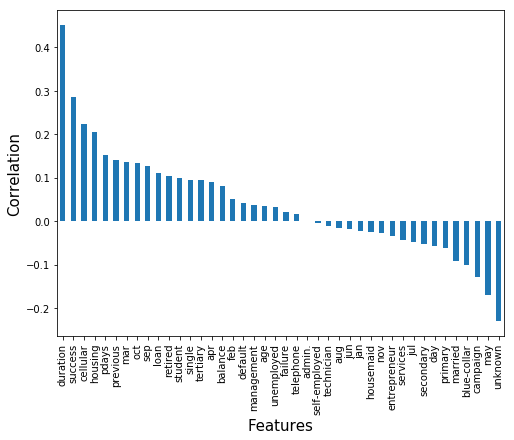

In [85]:

Corr2.plot.bar()
plt.xlabel("Features", fontsize=15)
plt.ylabel("Correlation", fontsize=15)


plt.show()

**Notes : **
1. As can be seen from the plot duration is a very important feature. This is the duration of last call with client. 
2. If the call duration is more , there are higher chances of getting a yes from the client. 
3. It has been sorted in descending order.
4. Succes , cellular, housing, unknown, campaign are also highly correlated